# Data Augmentations Check

## Preprocessing:
Here we will check what effects torchio transformations have on each volume
1. Crop or Pad
2. Mask - normalisation using label as a mask
3. One Hot Encoding

### Load data using the data_prep code
**NB: DO NOT RUN THE DATA PREPROC PART YET**

To ensure we are just working with a few functions at a time, py script is copied in below without preproc. We will run each example on several SSA and GLI datasets

#### Some functions from scripts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap

import json
from glob import glob
import time
import numpy as np
from matplotlib import rcParams 
import torchio as tio

In [ ]:
# Read in data files

# CHANGE data_dir path as per your local set up
pthAlex = '/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/data/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/'
pthAly = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples\\'

data_dir2 = pthAly
print(data_dir2)
specific_string = 'BraTS-'
# folders = os.listdir(data_dir)
folders = [folder for folder in os.listdir(data_dir2) if os.path.isdir(os.path.join(data_dir2, folder)) and folder.startswith(specific_string)]

print("Total folders: ", len(folders), "\n Subjects: ",  folders)

In [ ]:
#Select one subject to Explore
data_dir2 = pthAly
print(data_dir2)
specific_string = 'BraTS-'
# folders = os.listdir(data_dir)
folders = [folder for folder in os.listdir(data_dir2) if os.path.isdir(os.path.join(data_dir2, folder)) and folder.startswith(specific_string)]

print("Total folders: ", len(folders), "\n Subjects: ",  folders)
#randomly select a subject
img_folder = folders[random.randrange(0, len(folders))]
print(f"Working with subject: {img_folder}")

## Set up files
# Load image volumes
img_volumes = [nib.load(os.path.join(data_dir2 + img_folder, img_folder + f"-{m}.nii.gz")) for m in ["t1c", "t1n", "t2f", "t2w"]]

# Load segmentation volume
seg_volume = nib.load(os.path.join(data_dir2 + img_folder, img_folder + "-seg.nii.gz"))

subjects = [subj for subj in folders] 
print(subjects)

In [ ]:
subjects_tio = []
for s in subjects:
        subject = tio.Subject(
                image=tio.ScalarImage(os.path.join(data_dir2 + s, s + "-t1n.nii.gz")),
                label=tio.LabelMap(os.path.join(data_dir2 + s, s + "-seg.nii.gz")))
        subjects_tio.append(subject)
print(subjects_tio)

In [ ]:
import numpy as np
from scipy.ndimage import zoom

# Define the original array
original_array = np.random.random((240, 240, 155))

# Define the scaling factor
scale_factor = 0.8

# Calculate the new dimensions
new_shape = tuple(int(dim * scale_factor) for dim in original_array.shape)

# Scale down the array
scaled_array = zoom(original_array, scale_factor)

# Verify the new shape
print("Original shape:", original_array.shape)
print("Scaled shape:", scaled_array.shape)

In [ ]:
to_ras = tio.ToCanonical()
crop_pad_Zein = tio.CropOrPad((192, 224, 160), mask_name="label")
crop_padZ = tio.CropOrPad((192, 224, 160))
crop_padSc = tio.CropOrPad((192, 192, 124))
crop_pad_lbl = tio.CropOrPad(mask_name="label")


In [ ]:
for s in subjects_tio:
    ras = to_ras(s)
    ras.plot()

In [ ]:
for s in subjects_tio:
    cpSc = crop_padSc(s)
    cpZ = crop_padZ(s)
    cpSc.plot()
    cpZ.plot()

In [ ]:
for s in subjects_tio:
    cpZ = crop_pad_Zein(s)
    cpZ.plot()

In [ ]:
for s in subjects_tio:
    cpl = crop_pad_lbl(s)
    cpl.plot()

# FULL VISUALISATION -- USE EPS VERSION AT END

In [ ]:
pthAly = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\BraTS2023-SSA-TrainingData\\'

data_dir2 = pthAly
print(data_dir2)


In [ ]:
import os
import matplotlib.pyplot as plt
import torchio as tio

data_dir = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\BraTS2023-SSA-TrainingData\\'
output_dir = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\BraTS2023-SSA-TrainingData\\output'

modalities = ['t1n', 't2w', 't1c', 't2f', 'seg']
views = ['axial', 'sagittal', 'coronal']

transformations = [
    tio.ToCanonical(),
    tio.CropOrPad((192, 224, 160), mask_name="label"),
    tio.CropOrPad((192, 224, 160)),
    tio.CropOrPad((192, 192, 124)),
    tio.CropOrPad(mask_name="label"),
    tio.RandomFlip(axes=(0, 1, 2), p=0.3),
    tio.Resample((1.2, 1.2, 6)),
    tio.RandomAnisotropy(axes=(0, 1, 2), downsampling=(1, 6)),
    tio.RandomBlur(std=(0.5, 1.5)),
    tio.RandomNoise(mean=0, std=(0, 0.33)),
    tio.RandomMotion(num_transforms=3, image_interpolation='nearest'),
    tio.RandomBiasField(coefficients=1),
    tio.RandomGhosting(intensity=1.5)
]

specific_string = 'BraTS-'
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder)) and folder.startswith(specific_string)]
subjects = [subj for subj in folders]

subjects_tio = []
for subject in subjects:
    subject_dir = os.path.join(data_dir, subject)
    subject_images = {}
    
    for modality in modalities:
        file_pth = os.path.join(subject_dir, f'{subject}-{modality}.nii.gz')
        
        if modality == 'seg' and file_pth in seg_p:
            subject_images["label"] = tio.LabelMap(file_pth)
        else:
            subject_images[modality] = tio.ScalarImage(file_pth)
    
    subject_tio = tio.Subject(**subject_images)
    subjects_tio.append(subject_tio)

print(subjects_tio)

for modality in modalities:
    for subject in subjects_tio:
        fig, axes = plt.subplots(len(views), len(transformations), figsize=(20, 20))
        fig.suptitle(f'{subject} - {modality.capitalize()} Transforms')

        for i, view in enumerate(views):
            for j, transformation in enumerate(transformations):
                transformed_image = transformation(subject)

                if view == 'axial':
                    img = transformed_image.plot(axial=True)
                elif view == 'sagittal':
                    img = transformed_image.plot(sagittal=True)
                elif view == 'coronal':
                    img = transformed_image.plot(coronal=True)

                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')

                # Save figure as .png file
                filename = f'{modality}_{view}_{j+1}.png'
                plt.savefig(os.path.join(output_dir, filename))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.close()


C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\
Total folders:  4 
 Subjects:  ['BraTS-GLI-00002-000', 'BraTS-GLI-01035-000', 'BraTS-SSA-00002-000', 'BraTS-SSA-00046-000']
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-GLI-00002-000
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-GLI-01035-000
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-SSA-00002-000
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-SSA-00046-000


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

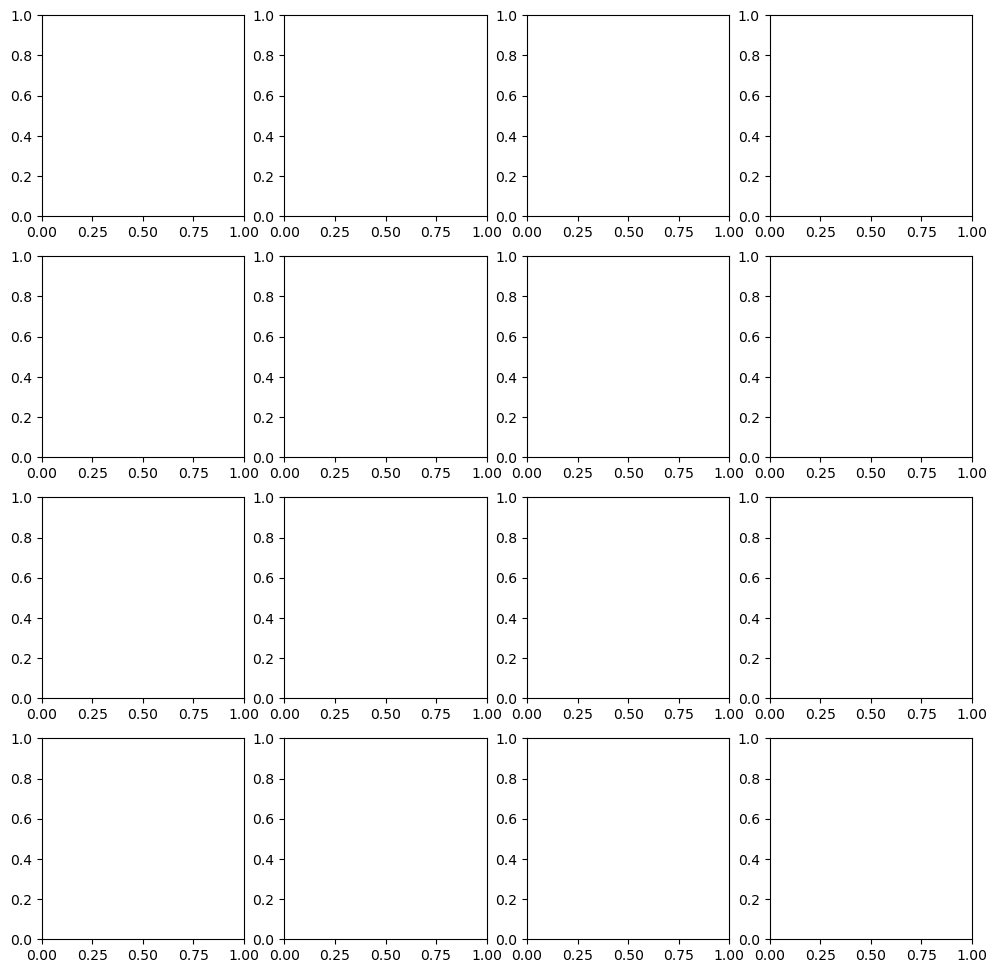

In [3]:
import os
import torch
import torchio as tio
import matplotlib.pyplot as plt
pthAly = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples\\'

data_dir = pthAly
print(data_dir)
specific_string = 'BraTS-'
# folders = os.listdir(data_dir)
folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder)) and folder.startswith(specific_string)]

print("Total folders: ", len(folders), "\n Subjects: ",  folders)
# Set the main data directory path
# data_dir = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\BraTS2023-SSA-TrainingData\\'
output_dir = os.path.join(data_dir, 'output')

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the list of transformations to apply
transformations = [
    tio.ToCanonical(),
    tio.CropOrPad((192, 224, 160), mask_name="seg"),
    tio.CropOrPad((192, 224, 160)),
    tio.CropOrPad((192, 192, 124)),
    tio.CropOrPad(mask_name="seg"),
    tio.RandomFlip(axes=(0, 1, 2), p=0.3),
    tio.Resample((1.2, 1.2, 6)),
    tio.RandomAnisotropy(axes=(0, 1, 2), downsampling=(1, 6)),
    tio.RandomBlur(std=(0.5, 1.5)),
    tio.RandomNoise(mean=0, std=(0, 0.33)),
    tio.RandomMotion(num_transforms=3, image_interpolation='nearest'),
    tio.RandomBiasField(coefficients=1),
    tio.RandomGhosting(intensity=1.5)
]

# Iterate through the subject folders
subject_dirs = sorted([os.path.join(data_dir, subject_dir) for subject_dir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subject_dir)) and subject_dir.startswith(specific_string)])
for subject_dir in subject_dirs:
    subject_id = os.path.basename(subject_dir)
    print(subject_dir)
    # Create a list to hold the subject's images and labels
    images = []
    labels = []

    # Load each scan modality and segmentation
    for modality in ['t1n', 't1c', 't2w', 't2f']:
        image_path = os.path.join(subject_dir, f'{subject_id}-{modality}.nii.gz')
        image = tio.ScalarImage(image_path)
        images.append(image)

    label_path = os.path.join(subject_dir, f'{subject_id}-seg.nii.gz')
    label = tio.LabelMap(label_path)
    labels.append(label)

    # Create the subject using the images and labels
    subject = tio.Subject(
        t1n=images[0],
        t1c=images[1],
        t2w=images[2],
        t2f=images[3],
        seg=labels[0]
    )

    # Create the dataset with the subject
    dataset = tio.SubjectsDataset([subject])

    # Apply transformations and save the resulting figures
    transformed_subjects = []
    for current_transformation in transformations:
        for current_subject in dataset:
            transformed_subject = current_transformation(current_subject)
            transformed_subjects.append(transformed_subject)

transformed_dataset = tio.SubjectsDataset(transformed_subjects)

# Create a figure for all views
fig, axes = plt.subplots(len(subject_dirs), 4, figsize=(12, 3 * len(subject_dirs)))

# Iterate through the transformed subjects and plot the images
for subject_index, transformed_subject in enumerate(transformed_dataset):
    # Get the transformed images and labels
    transformed_images = [transformed_subject['t1n'], transformed_subject['t1c'], transformed_subject['t2w'], transformed_subject['t2f']]
    transformed_label = transformed_subject['seg']

    # Iterate through the views and plot the images
    for j, view in enumerate(['axial', 'coronal', 'sagittal']):
        ax = axes[subject_index, j]
        ax.imshow(transformed_images[j].data.squeeze().numpy()[:,:,view])
        ax.axis('off')
        ax.set_title(f'{modality.upper()} {view}')

    # Plot the segmentation label for the current subject
    ax = axes[subject_index, 3]
    ax.imshow(transformed_label.data.squeeze().numpy()[:,:,view])
    ax.axis('off')
    ax.set_title('Segmentation')

# Save the figure as an EPS file
output_filename = f'all_subjects_{view}_{transformation.name}.eps'
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path, format='eps')

plt.close(fig)